#  <font color='dark gary'> K-Means with dynamic time warping Anomaly detection method
## Tslearn, A Machine Learning Toolkit for Time Series Data
- https://towardsdatascience.com/how-to-apply-k-means-clustering-to-time-series-data-28d04a8f7da3
- https://www.jmlr.org/papers/volume21/20-091/20-091.pdf

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
get_ipython().run_line_magic('matplotlib', 'inline')

## Installation

##conda install -c conda-forge tslearn

## tslearn (code on github)
- https://tslearn.readthedocs.io/en/stable/index.html#
#### tslearn은 3 tensor 데이터를 기본
tslearn expects a time series dataset to be formatted as a 3D numpy array. The three dimensions correspond to the number of time series, the number of measurements per time series and the number of dimensions respectively (n_ts, max_sz, d). In order to get the data in the right format, different solutions exist:

In [2]:
a = np.array([[0, 1, 2], [3, 4, 5]])
a.shape
a

(2, 3)

array([[0, 1, 2],
       [3, 4, 5]])

In [3]:
sample = np.array([[1, 2, 3, 4], [1, 2, 3], [2, 5, 6, 7, 8, 9]])
sample.shape
sample

(3,)

array([list([1, 2, 3, 4]), list([1, 2, 3]), list([2, 5, 6, 7, 8, 9])],
      dtype=object)

In [4]:
from tslearn.utils import to_time_series_dataset
X = to_time_series_dataset(sample)
X.shape
y = [0, 0, 1]

pd.DataFrame(X[:,:,0])

(3, 6, 1)

,0,1,2,3,4,5
0,1.0,2.0,3.0,4.0,NaN,NaN
1,1.0,2.0,3.0,NaN,NaN,NaN
2,2.0,5.0,6.0,7.0,8.0,9.0


In [5]:
from tslearn.neighbors import KNeighborsTimeSeriesClassifier
knn = KNeighborsTimeSeriesClassifier(n_neighbors=2)
knn.fit(X, y)
knn.predict(X)

KNeighborsTimeSeriesClassifier(n_neighbors=2)

array([0, 0, 0])

# Getting started
## 1. Time series format

In [6]:
from tslearn.utils import to_time_series
my_first_time_series = [1, 3, 4, 2]
np.array(my_first_time_series).shape
formatted_time_series = to_time_series(my_first_time_series)
print(formatted_time_series.shape)

(4,)

(4, 1)


In tslearn, a time series is nothing more than a two-dimensional numpy array with its first dimension corresponding to the time axis and the second one being the feature dimensionality (1 by default).

Then, if we want to manipulate sets of time series, we can cast them to three-dimensional arrays, using to_time_series_dataset. If time series from the set are not equal-sized, NaN values are appended to the shorter ones and the shape of the resulting array is (n_ts, max_sz, d) where max_sz is the maximum of sizes for time series in the set.

In [7]:
from tslearn.utils import to_time_series_dataset
my_first_time_series = [1, 3, 4, 2]
my_second_time_series = [1, 2, 4, 2]
formatted_dataset = to_time_series_dataset([my_first_time_series, my_second_time_series])
print(formatted_dataset.shape)

(2, 4, 1)


In [8]:
my_third_time_series = [1, 2, 4, 2, 2]
formatted_dataset = to_time_series_dataset([my_first_time_series,
                                            my_second_time_series,
                                            my_third_time_series])
print(formatted_dataset.shape)

(3, 5, 1)


## 2. Importing standard time series datasets
If you aim at experimenting with standard time series datasets, you should have a look at the tslearn.datasets.

In [9]:
from tslearn.datasets import UCR_UEA_datasets
X_train, y_train, X_test, y_test = UCR_UEA_datasets().load_dataset("TwoPatterns")
type(X_train)
print(X_train.shape)
print(y_train.shape)

numpy.ndarray

(1000, 128, 1)
(1000,)


Note that when working with time series datasets, it can be useful to rescale time series using tools from the tslearn.preprocessing..

## 3. Playing with your data
Once your data is loaded and formatted according to tslearn standards, the next step is to feed machine learning models with it. Most tslearn models inherit from scikit-learn base classes, hence interacting with them is very similar to interacting with a scikit-learn model, except that datasets are not two-dimensional arrays, but rather tslearn time series datasets (i.e. three-dimensional arrays or lists of two-dimensional arrays).

- X_train은 1,000개 time axis, 128개 features

In [10]:
pd.DataFrame(np.squeeze(X_train))

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.230379,0.490966,0.358833,-0.230965,0.090225,-0.501473,-0.339329,0.066836,0.232949,0.028326,...,-1.680129,-1.680129,0.105036,-0.264838,0.306594,-0.075228,-0.222192,0.210745,-0.255429,-0.278942
1,0.000765,-0.342680,0.188729,-0.479362,-0.281932,0.351927,-0.360330,0.121821,-0.285499,0.085623,...,0.148473,-0.221473,-0.090350,0.606164,-0.589216,-0.187478,-0.189875,-0.642700,-0.121495,0.525895
2,0.170442,-0.018864,0.402452,-0.075797,0.156014,-0.150981,-0.171141,-0.179950,-0.108274,0.175447,...,0.098403,-0.122188,-0.043269,-0.205324,0.093592,0.346100,-0.508802,-0.220517,0.257965,0.662665
3,0.239996,0.709401,-0.686034,0.615863,-0.345213,-0.677124,-0.890195,-0.150061,-0.183684,-0.555484,...,-0.185940,-0.291869,0.181239,-0.404985,0.282751,0.065136,-0.389442,-0.034956,0.548547,-0.599219
4,0.404257,0.824277,-0.427975,-0.345740,0.461754,0.211839,0.395389,0.009144,-0.173102,-0.102791,...,-1.756405,-1.756405,-1.756405,-1.756405,-1.756405,-1.756405,-1.756405,-0.227913,-0.002611,-0.482962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.074781,-0.403872,0.291261,0.115829,0.003982,0.496090,-1.492083,-1.492083,-1.492083,-1.492083,...,-0.448258,0.012827,0.573869,0.177051,0.377711,-0.217953,0.345450,-0.105799,-0.446109,0.060095
996,0.030514,0.312165,0.293222,0.686956,-0.409233,-0.286344,-0.073776,-0.377694,0.059337,-1.540579,...,-0.237559,-0.135427,0.024679,0.655554,0.322178,-0.369771,0.153728,-0.144862,0.042389,0.782946
997,-0.359984,0.225779,0.017964,-0.136261,-0.350237,1.546863,1.546863,1.546863,1.546863,1.546863,...,0.047785,-0.184004,-0.224689,0.369715,0.067947,0.204335,0.150944,0.374297,0.416022,-0.273367
998,0.246860,-0.336971,-0.371287,-0.152266,0.204181,-0.024290,0.168112,0.149965,0.695047,-1.489582,...,0.587133,0.213377,-0.286321,-0.436844,-0.254895,0.584190,-0.372136,0.068405,0.091422,0.427667


### what is dynamic time warping?
- https://en.wikipedia.org/wiki/Dynamic_time_warping
- https://dinhanhthi.com/dynamic-time-warping-dtw/
<img src = 'https://dinhanhthi.com/img/post/time-series/Euclidean-distance-vs-DTW-1280w.webp'>
<img src = 'https://dinhanhthi.com/img/post/time-series/dtw-example-1280w.webp'>

In [11]:
from tslearn.metrics import dtw
dtw([1, 2, 3], [1., 2., 3.])
dtw([1, 2, 3], [1., 2., 4.])
dtw([1, 2, 3], [1., 2., 7.])

dtw([1, 2, 3], [1., 2., 2., 3.])
dtw([1, 2, 3], [1., 2., 2., 2., 2., 2., 2., 3.])
dtw([1, 2, 3], [1., 2., 2., 3., 4.])

0.0

1.0

4.0

0.0

0.0

1.0

## Dynamic Time Warping (DTW)

1.4142135623730951

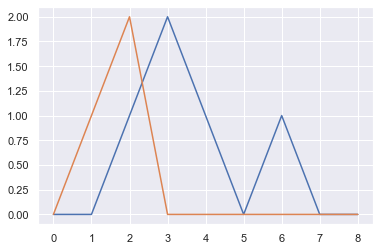

In [27]:
s1 = [0, 0, 1, 2, 1, 0, 1, 0, 0]
s2 = [0, 1, 2, 0, 0, 0, 0, 0, 0]
plt.plot(s1); plt.plot(s2)
dtw(s1, s2)

14.7648230602334

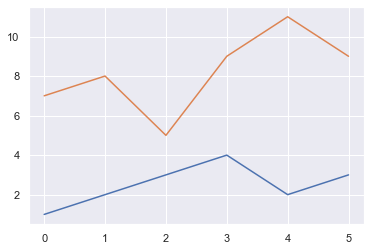

In [14]:
s1 = [1,2,3,4,2,3]
s2 = [7,8,5,9,11,9]
plt.plot(s1); plt.plot(s2)
dtw(s1, s2)

0.0

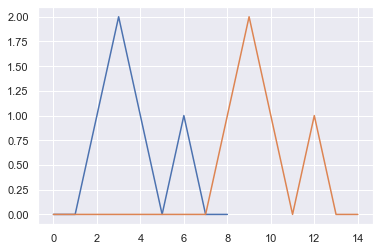

In [138]:
s1 = [0, 0, 1, 2, 1, 0, 1, 0, 0]
s2 = [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 0]
plt.plot(s1); plt.plot(s2)
dtw(s1, s2)

### 예제

In [40]:
from tslearn.clustering import TimeSeriesKMeans
km = TimeSeriesKMeans(n_clusters=3, metric="dtw")

In [93]:
timeseries = np.array([
     [0., 0, 1, 2, 1, 0, 1, 0, 0],
     [0., 1, 2, 0, 0, 0, 0, 0, 0],
     [1., 2, 0, 0, 0, 0, 0, 1, 1],
     [0., 0, 1, 2, 1, 0, 1, 0, 0],
     [0., 1, 2, 0, 0, 0, 0, 0, 0],
     [0., 0, 0, 0, 0, 1, 2, 0, 0],
     [1., 2, 0, 0, 0, 0, 0, 1, 1]])

timeseries_pd = pd.DataFrame(timeseries, 
                             columns=['t+1','t+2','t+3','t+4','t+5','t+6','t+7','t+8','t+9'])
timeseries_pd

,t+1,t+2,t+3,t+4,t+5,t+6,t+7,t+8,t+9
0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0
1,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0
4,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0
6,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


<AxesSubplot:>

0.0

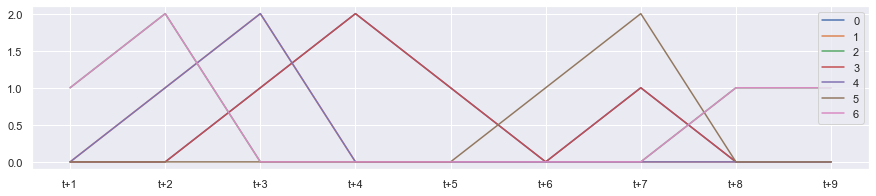

In [94]:
timeseries_pd.T.plot(figsize=(15,3))
dtw(timeseries_pd.loc[4, :], timeseries_pd.loc[5, :])

### np.array_K-means(dtw)

In [95]:
km = TimeSeriesKMeans(n_clusters=3, metric="dtw")
km.fit(timeseries)
km.predict(timeseries)

TimeSeriesKMeans(metric='dtw')

array([2, 0, 1, 2, 0, 0, 1], dtype=int64)

### pandas_K-means(dtw)

In [96]:
km = TimeSeriesKMeans(n_clusters=3, metric="dtw")
km.fit(timeseries_pd)
km.predict(timeseries_pd)

TimeSeriesKMeans(metric='dtw')

array([2, 0, 1, 2, 0, 0, 1], dtype=int64)

In [34]:
km.fit(X_train)

TimeSeriesKMeans(metric='dtw')

In [45]:
X_test.shape
y_pred = km.predict(X_test)

(4000, 128, 1)

(4000,)

In [91]:
data = pd.DataFrame(np.squeeze(X_test))
data['cluster'] = y_pred
data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,cluster
0,0.092276,-0.223990,0.147545,-0.431031,-0.304397,0.244396,-0.144781,0.299219,-0.443211,0.259552,...,-1.504237,-1.504237,0.159724,0.265907,0.138505,-0.334746,-0.544100,-0.184376,0.108490,0
1,-0.283450,-0.326020,0.330485,0.061099,-0.285491,0.085344,0.672175,-0.043962,-0.177207,0.192364,...,0.322911,0.009204,-0.179319,-0.047088,0.298377,-0.164910,0.935590,0.092190,-0.401522,2
2,-0.430795,0.155334,-0.721453,-0.102576,-0.332756,0.101725,-0.432919,0.276727,0.386408,0.144596,...,-0.196227,-0.031192,-0.111958,0.115843,0.053130,0.114425,-0.096989,0.668431,0.049152,0
3,-0.531494,0.103033,0.323408,-0.616874,0.179767,-0.111653,-0.180944,-0.181608,0.437917,0.117363,...,1.683367,1.683367,1.683367,1.683367,1.683367,1.683367,1.683367,1.683367,-0.162545,0
4,-0.153574,-0.087640,-0.240677,-0.202274,-0.115275,0.021871,-0.123556,-0.181116,0.062237,-0.127736,...,0.965358,-0.691474,-0.332806,-0.125958,-0.390833,0.079431,-0.088307,-0.095284,-0.047731,0
5,-0.349061,0.419365,-0.230411,0.446621,-0.432607,-0.192926,0.581457,0.356121,-0.177010,-0.065259,...,-0.183541,-0.058119,-0.375052,0.055348,0.066159,-0.315190,0.146058,0.025510,-0.061479,2
6,0.042369,-0.491693,0.432670,0.051966,-0.274385,-0.330518,-0.137227,-0.424278,1.447462,1.447462,...,0.406636,-0.342532,-0.068167,0.196201,-0.063789,-0.357538,-0.036437,-0.277776,0.683957,0
7,0.764622,-0.202979,-0.149776,0.201866,0.587360,0.002471,0.160114,-0.178211,0.109273,0.806457,...,-0.144279,-0.083543,0.019268,0.084665,-0.226002,0.515937,0.052837,-0.150240,-0.281126,0
8,-0.088471,0.644567,0.433162,-0.136737,-0.054831,-0.244218,-0.446411,-0.261631,-0.135061,-0.034967,...,-0.083642,-0.031550,0.398518,0.267720,0.407303,0.015141,0.560284,-0.186790,0.361624,1
9,0.208425,-0.087607,0.043846,-0.061058,0.195374,-0.315768,1.371756,1.371756,1.371756,1.371756,...,-0.388356,0.117444,1.145216,-0.255835,-0.328621,-0.177336,0.133318,-0.279935,-0.123262,2


- 첫번째 instance 벡터와의 dtw거리를 계산하여 '7.5'가 넘으면 cluster 2로 분류

In [92]:
for i, j in zip([dtw(data.iloc[0,:-1], data.iloc[i,:-1]) for i in range(10)], data['cluster'][0:10]):
    (i, j)

(0.0, 0)

(7.564865477835785, 2)

(5.905339620755554, 0)

(6.39491986574684, 0)

(3.197223650779144, 0)

(7.603633133933423, 2)

(6.251602235938554, 0)

(6.066899296782613, 0)

(6.73834935440688, 1)

(7.276261554522157, 2)

## 4. Practice to get started
- https://github.com/tslearn-team/tslearn/

### 4.1. Getting the data in the right format
- It should further be noted that tslearn supports variable-length timeseries.

In [103]:
my_first_time_series = [1, 3, 4, 2]
my_second_time_series = [1, 2, 4, 2]
my_third_time_series = [1, 2, 4, 2, 2]
X = to_time_series_dataset([my_first_time_series,
                            my_second_time_series,
                            my_third_time_series])
y = [0, 1, 1]
X

array([[[ 1.],
        [ 3.],
        [ 4.],
        [ 2.],
        [nan]],

       [[ 1.],
        [ 2.],
        [ 4.],
        [ 2.],
        [nan]],

       [[ 1.],
        [ 2.],
        [ 4.],
        [ 2.],
        [ 2.]]])

### 4.2. Data preprocessing and transformations
Optionally, tslearn has several utilities to preprocess the data. In order to facilitate the convergence of different algorithms, you can scale time series. Alternatively, in order to speed up training times, one can resample the data or apply a piece-wise transformation.

In [29]:
from tslearn.preprocessing import TimeSeriesScalerMinMax
X_scaled = TimeSeriesScalerMinMax().fit_transform(X)
print(X_scaled)

[[[0.        ]
  [0.66666667]
  [1.        ]
  [0.33333333]
  [       nan]]

 [[0.        ]
  [0.33333333]
  [1.        ]
  [0.33333333]
  [       nan]]

 [[0.        ]
  [0.33333333]
  [1.        ]
  [0.33333333]
  [0.33333333]]]


### 4.3. Training a model
After getting the data in the right format, a model can be trained. Depending on the use case, tslearn supports different tasks: classification, clustering and regression.
- https://tslearn.readthedocs.io/en/stable/variablelength.html#classification

In [30]:
from tslearn.neighbors import KNeighborsTimeSeriesClassifier
knn = KNeighborsTimeSeriesClassifier(n_neighbors=1)
knn.fit(X_scaled, y)
print(knn.predict(X_scaled))

KNeighborsTimeSeriesClassifier(n_neighbors=1)

[0 1 1]


### 4.4. Integration with scikit-learn

In [93]:
from tslearn.utils import to_sklearn_dataset
to_sklearn_dataset([[1, 2], [1, 4, 3]])
to_time_series_dataset([[ 1.,  2., None], [ 1.,  4.,  3.]])

array([[ 1.,  2., nan],
       [ 1.,  4.,  3.]])

array([[[ 1.],
        [ 2.],
        [nan]],

       [[ 1.],
        [ 4.],
        [ 3.]]])

In [112]:
np.squeeze(X_train)
to_sklearn_dataset(X_train)

array([[ 0.2303793 ,  0.49096649,  0.35883306, ...,  0.21074476,
        -0.25542933, -0.27894241],
       [ 0.00076522, -0.34267997,  0.18872921, ..., -0.64269981,
        -0.12149454,  0.52589527],
       [ 0.17044215, -0.01886377,  0.4024516 , ..., -0.22051709,
         0.25796549,  0.66266508],
       ...,
       [-0.35998444,  0.22577919,  0.01796405, ...,  0.37429672,
         0.4160218 , -0.27336748],
       [ 0.24685978, -0.33697087, -0.3712872 , ...,  0.0684051 ,
         0.09142212,  0.42766655],
       [-0.31033582, -0.24524647, -0.30000574, ...,  0.3907156 ,
        -0.15506771,  0.6423072 ]])

array([[ 0.2303793 ,  0.49096649,  0.35883306, ...,  0.21074476,
        -0.25542933, -0.27894241],
       [ 0.00076522, -0.34267997,  0.18872921, ..., -0.64269981,
        -0.12149454,  0.52589527],
       [ 0.17044215, -0.01886377,  0.4024516 , ..., -0.22051709,
         0.25796549,  0.66266508],
       ...,
       [-0.35998444,  0.22577919,  0.01796405, ...,  0.37429672,
         0.4160218 , -0.27336748],
       [ 0.24685978, -0.33697087, -0.3712872 , ...,  0.0684051 ,
         0.09142212,  0.42766655],
       [-0.31033582, -0.24524647, -0.30000574, ...,  0.3907156 ,
        -0.15506771,  0.6423072 ]])

In [113]:
np.squeeze(X)
to_sklearn_dataset(X)

array([[ 1.,  3.,  4.,  2., nan],
       [ 1.,  2.,  4.,  2., nan],
       [ 1.,  2.,  4.,  2.,  2.]])

array([[ 1.,  3.,  4.,  2., nan],
       [ 1.,  2.,  4.,  2., nan],
       [ 1.,  2.,  4.,  2.,  2.]])

### 4.5. Integration with scikit-learn

In [117]:
from tslearn.utils import from_sktime_dataset, to_sktime_dataset
df = pd.DataFrame()
df["dim_0"] = [pd.Series([1, 2]), pd.Series([1, 4, 3])]
from_sktime_dataset(df)
from_sktime_dataset(df).shape

array([[[ 1.],
        [ 2.],
        [nan]],

       [[ 1.],
        [ 4.],
        [ 3.]]])

(2, 3, 1)

In [118]:
to_sktime_dataset([[[1], [2], [None]], [[1], [4], [3]]])
to_sktime_dataset([[[1], [2], [None]], [[1], [4], [3]]]).shape

,dim_0
0,0 1.0 1 2.0 dtype: float64
1,0 1.0 1 4.0 2 3.0 dtype: float64


(2, 1)

# End